In [103]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
# plt.style.use('dark_background')

In [23]:
with open("dataset/gacrp-publicLB.html") as f:
    html = f.read()
soup = BeautifulSoup(html)

# for i, row in enumerate(soup.findAll('tr')):
#     if i==0:
#         for element in row:
#             print(element)

In [76]:
cols = ['Rank', 'Change', 'TeamName', 'Kernel', 
        'TeamMembers', 'Score', 'NumberOfEntries', 'LastEntry']

contents = []
for i, row in enumerate(soup.findAll('tr')):
    row_list = row.findAll("td")  
    if len(row_list) == 8:
        for element in row_list:
            contents += [element.string]
        
data = pd.DataFrame(data = np.array(contents).reshape(int(len(contents)/8), len(cols)),
                    columns = cols).astype({"Rank": int, "Score": float, "NumberOfEntries": int})
data.head(3)

,Rank,Change,TeamName,Kernel,TeamMembers,Score,NumberOfEntries,LastEntry
0,1,new,Marwen Sallem,None,None,0.0,2,7d
1,2,new,Paulo Pinto,None,None,0.0,8,8h
2,3,new,Gautam,None,None,0.0,2,6d


In [105]:
num_team_zero_oneshot = data[(data["Score"] == 0) & (data["NumberOfEntries"]==1)].shape[0]
num_team_zero_all =  data[(data["Score"] == 0)].shape[0]
print("The number of the teams who submit only one submission, whose score is zero:", num_team_zero_oneshot)
print("The number of the teams who score zero:", num_team_zero_all)

The number of the teams who submit only one submission, whose score is zero: 177
The number of the teams who score zero: 271


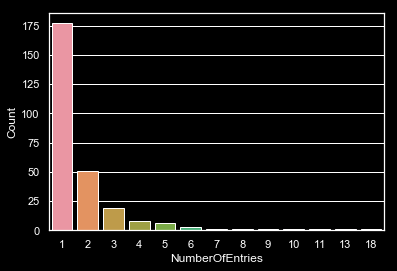

In [107]:
score_zero_subit_num = data[(data["Score"] == 0)]["NumberOfEntries"].value_counts().to_frame().reset_index()
score_zero_subit_num.rename(columns={"index": "NumberOfEntries", "NumberOfEntries": "Count"}, inplace=True)

ax = sns.barplot(x="NumberOfEntries", y="Count", data=score_zero_subit_num)
plt.show()